## Baseball Analysis - Are the Big Leagues Getting Better?

### Starting Comments

Using the dataset linked by Udacity, and provided by Sean Lahman at [his website](http://www.seanlahman.com/baseball-archive/statistics/), I decided to do a little bit of rummaging through the dataset to figure out whether or not batters were getting better, worse, or staying the same year over year. My code is provided below with a few notes from myself. I used documentation from [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html) to create my plots.

How do we measure if batters are doing better or worse? What data are we privy to to make this analysis? 

I used Batting.csv for this analysis. In it we have some interesting statistics: 
playerID - who the player is that is doing the batting.
yearID - the year in which the player is doing the batting.
H - number of hits the player got in a year.
2B, 3B, HR - number of doubles, triples, and home runs the player got in a year.
AB - number of "at bats" a player has.

There is one missing statistic that I made myself - batting average. This statistic is made by dividing the number of hits by the humber of "at bats" (AB) that a player has. It is an industry-wide statistic that is used to see how well the batters are doing.

To figure out whether or not batters are getting better or worse is to measure all their hits, doubles, triples, home runs, and their batting average year over year to see if there is a positive correlation between them and if the total number of all of them is going up or down year over year. 

If we were to make this analysis more rigorous, we could also include a null hypothesis test where we see if the numbers are actually statistically valid year over year or if they are just noise. If the scores are all noise - as in they are generated at random and do not actually follow a trend - then the correlations that we draw here are inconclusive because of lack of statistical validity.

In [1]:
# Importing necessary libraries for data analysis work
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Reading in the batting csv
df = pd.read_csv("Batting.csv")

In [2]:
# Quick check on how the data looks.
df.head()
# Initializing batting average.
df["Batting_Average"] = df["H"] / df["AB"]

### Initial Statistics

What pieces of information should we be looking into most to figure out who is batting better or worst? Is there a best statistic that will allow us to find this information?

This question is hard to answer as is because of the number of possible statistics that might speak towards batters being better or worse on average. How do we define a good batter vs. a bad batter?

What we can do is see what the trends indicate year over year. If we look at all the different statistics together, we may get a better idea of which pieces are highly correlated and whether or not they are trending up, down, or standing still over time.

At the beginning, however, it is best to look at initial statistics of variables and see how they hold up. What do the distributions look like overall for these batters?

Batting average seems to be the closest to a normal distribution than all of the rest, very likely because it is a mix of the hit and at bat statistics. The others we are looking at here, hits and home runs, are long tail distributions. Though their average is steady towards 37 and 3 respectively, they have outliers that skew their standard deviations towards larger numbers that are unfit for a normal distribution categorization. 

In [3]:
# What type of measurements are we getting here? How do the batting and home run averages look like since 1871?
df.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Batting_Average
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000,87435.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018,0.208779
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153,0.122413
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147059
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000,0.274310
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000,1.000000


Populating the interactive namespace from numpy and matplotlib


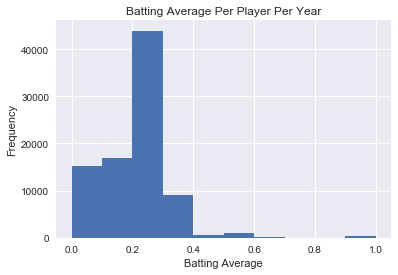

In [6]:
# Plotting histogram of hits. Notice the long tail of the distribution and the
# concentration of most of the hits towards zero to twenty-five.
%pylab inline
plt.hist(df["Batting_Average"].dropna())
plt.title("Batting Average Per Player Per Year")
plt.ylabel('Frequency')
plt.xlabel("Batting Average")

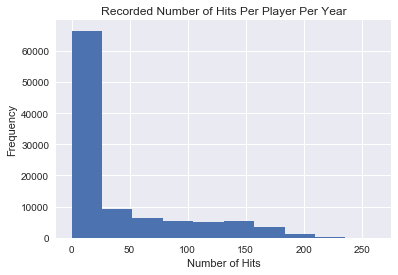

In [81]:
# Plotting histogram of hits. Notice the long tail of the distribution and the
# concentration of most of the hits towards zero to twenty-five.

plt.hist(df["H"])
plt.title("Recorded Number of Hits Per Player Per Year")
plt.ylabel('Frequency')
plt.xlabel("Number of Hits")

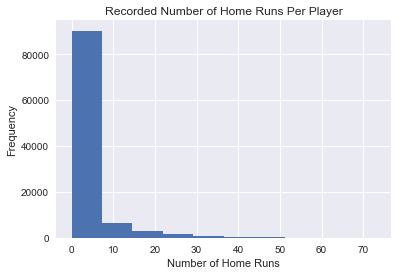

In [61]:
# Plotting histogram of home runs. Notice the long tail of the distribution and the
# concentration of most of the hits towards zero to ten.

plt.hist(df["HR"])
plt.title("Recorded Number of Home Runs Per Player Per Year")
plt.ylabel('Frequency')
plt.xlabel("Number of Home Runs")

### Average Performance of Batters

When we look at the average performance of batters we can see that their performance is not looking great at all. The mean hits, batting average, and triples all seem highly positively correlated and trending downwards, showing a trend in negative performance from batters overall. Home runs, on the other hand, are negatively correlated with the other three and seems to be steadily rising year over year. Doubles seem not to be rising or falling at all.

What can we conclude from this? It's hard to say. There are no causal relationships that we can assure at the moment from this analysis, only the positive or negative correlations between the different measurements. As an additional check, I ran a quick analysis on pitching statistics as well which show a negative correlation between batting averages and strike outs, and a positive correlation between batting averages and earned runs. It seems that there is a correlation between batters doing worse overall, pitchers doing better overall, or a mix of the two.

We can say at the end that there seems to be a positively correlated relationship between the negative performance of batters and the positive performance of pitchers year over year. Though we cannot say for sure that there is a causal relationship between the two without some analysis of collinearity and multi-variate regressions, we can say that there is a negative correlation between batting averages and yearly change, and that pitchers have a positive correlation between strike outs and yearly change. It suggests that there is a negative correlation to how well batters are playing, and in turn, there is reason to do further research and figure out if batters are truly doing worse year over year, or if there is some other factor that is causing these correlations between batting statistics. Another piece of research to be done is to track the individual scores of batters and to figure out whether or not individual batters are doing worse over time, if their performance is due to noise, or if some are doing better over time and it is simply the collective group that is doing worse over time. 

Populating the interactive namespace from numpy and matplotlib


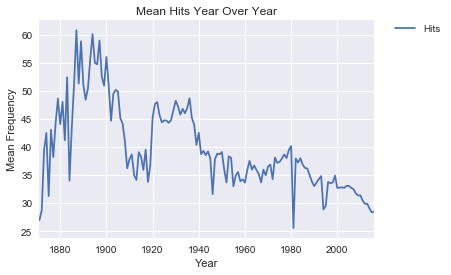

In [83]:
# Line graph of mean hits over years
df.groupby('yearID').mean()["H"].plot(label = "Hits")
plt.title("Mean Hits Year Over Year")
plt.ylabel('Mean Frequency')
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

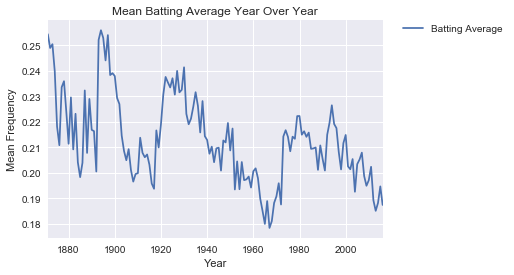

In [84]:
# Line graph of mean batting average over years
df.groupby('yearID').mean()["Batting_Average"].plot(label = "Batting Average")
plt.title("Mean Batting Average Year Over Year")
plt.ylabel('Mean Frequency')
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

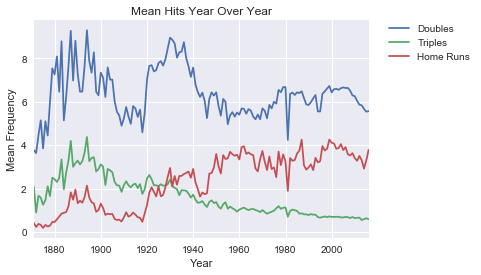

In [60]:
# Line graph of mean doubles, triples, and home runs over years
df.groupby('yearID').mean()["2B"].plot(label = "Doubles")
df.groupby('yearID').mean()["3B"].plot(label = "Triples")
df.groupby('yearID').mean()["HR"].plot(label = "Home Runs")

plt.title("Mean Hits Year Over Year")
plt.ylabel('Mean Frequency')
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

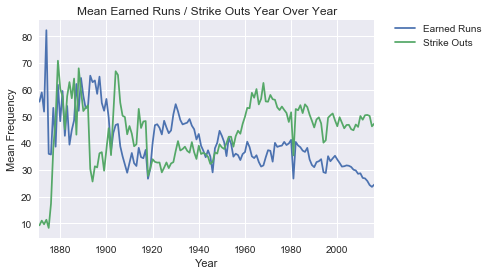

In [9]:
# Reading in pitching data
df_pitching = pd.read_csv("Pitching.csv")

# Line graph of earned runs and strike outs over years
df_pitching.groupby('yearID').mean()["ER"].plot(label = "Earned Runs")
df_pitching.groupby('yearID').mean()["SO"].plot(label = "Strike Outs")
plt.title("Mean Earned Runs / Strike Outs Year Over Year")
plt.ylabel('Mean Frequency')
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)